In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Galvanostatic Deposition\Mimic Round3'
folders = [ os.path.join(path, i) for i in os.listdir(path)]
folders

['C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Electrochemical\\Galvanostatic Deposition\\Mimic Round3\\CV',
 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Electrochemical\\Galvanostatic Deposition\\Mimic Round3\\Galvanostatic',
 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Electrochemical\\Galvanostatic Deposition\\Mimic Round3\\Potentiostatic']

Text(0.5, 0, 'Potential vs Li/Li$^+$ (V)')

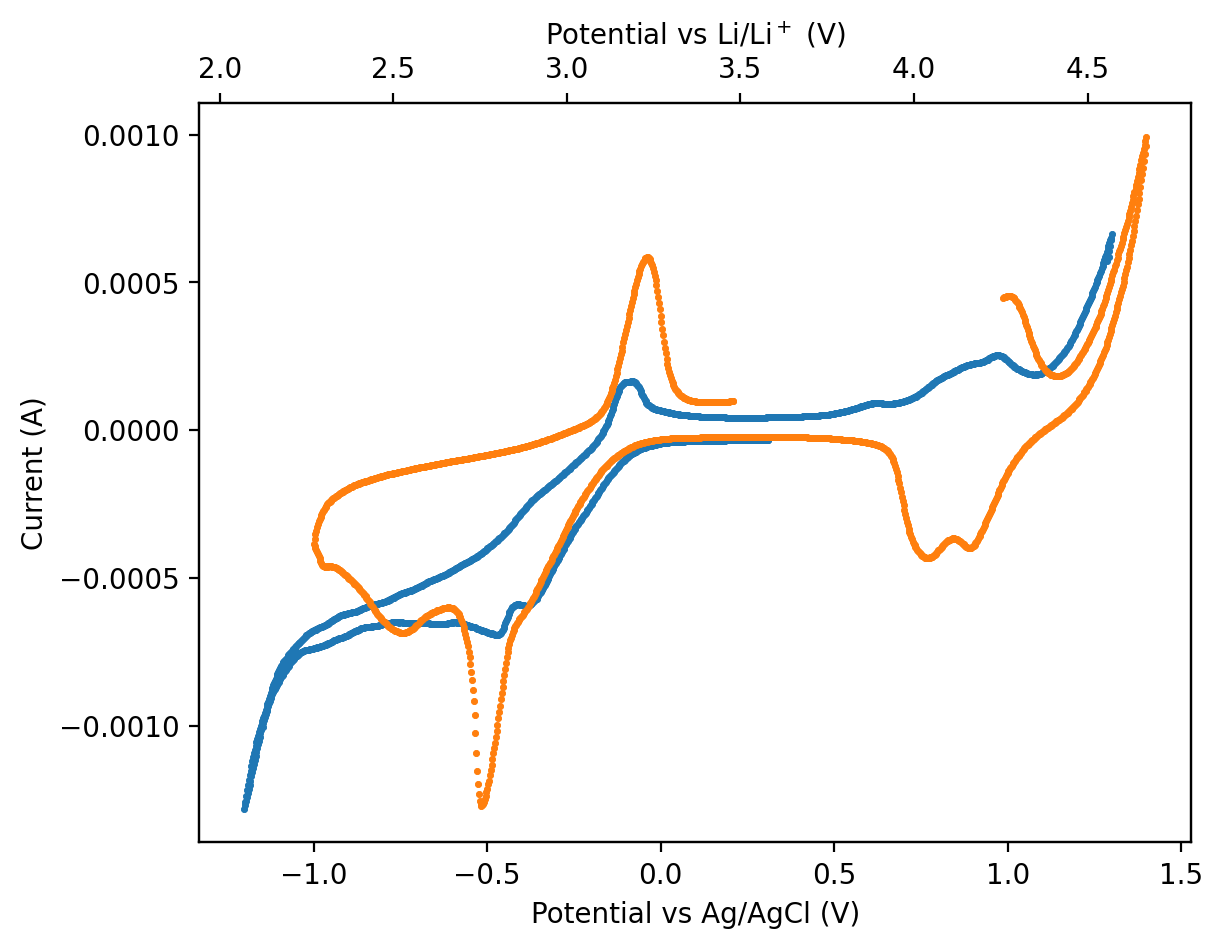

In [45]:
# CV
cv_files = [os.path.join(folders[0], i) for i in os.listdir(folders[0])]

df = pd.read_csv(cv_files[0], sep='\t')
df2 = pd.read_csv(cv_files[1], sep='\t')
df3 = pd.read_csv(cv_files[0], sep='\t')
df4 = pd.read_csv(cv_files[1], sep='\t')

df3['WE(1).Potential (V)'] = df3['WE(1).Potential (V)'] + 3.05 + 0.22
df4['WE(1).Potential (V)'] = df4['WE(1).Potential (V)'] + 3.05 + 0.22

#Plot
fig, ax = plt.subplots(dpi = 200)

ax2 = ax.twiny()

sns.scatterplot(data = df, x = 'WE(1).Potential (V)', y = 'WE(1).Current (A)', edgecolor = None, s = 5, ax = ax)
sns.scatterplot(data = df2, x = 'WE(1).Potential (V)', y = 'WE(1).Current (A)', edgecolor = None, s = 5, ax = ax)
sns.scatterplot(data = df3, x = 'WE(1).Potential (V)', y = 'WE(1).Current (A)', edgecolor = None, s = 5, ax = ax2)
sns.scatterplot(data = df4, x = 'WE(1).Potential (V)', y = 'WE(1).Current (A)', edgecolor = None, s = 5, ax = ax2)

ax.set_xlabel('Potential vs Ag/AgCl (V)')
ax.set_ylabel('Current (A)')
# ax.set_xlim(-1.3, 1.5)
# ax2.set_xlim(-1.3, 1.5)
ax2.set_xlabel('Potential vs Li/Li$^+$ (V)')




(-0.015, 0.01)

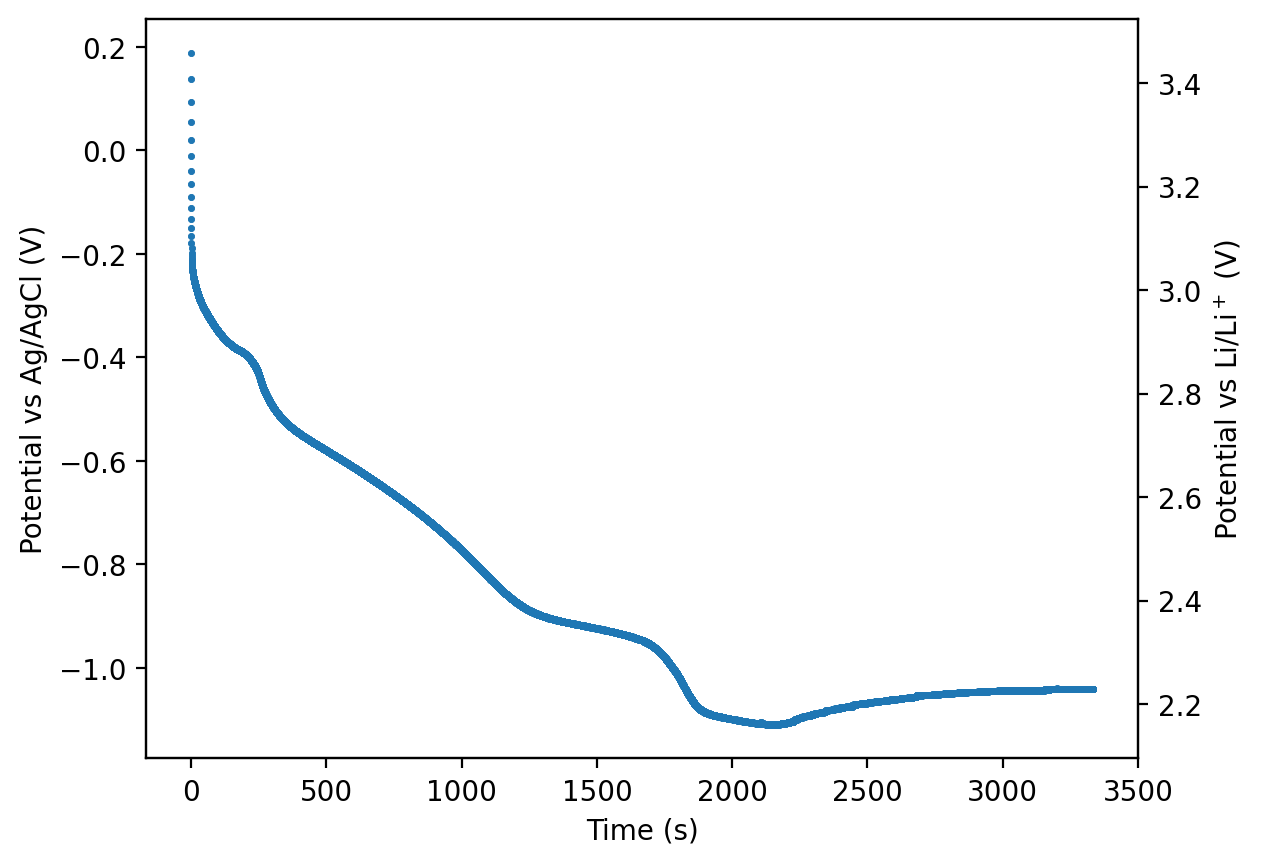

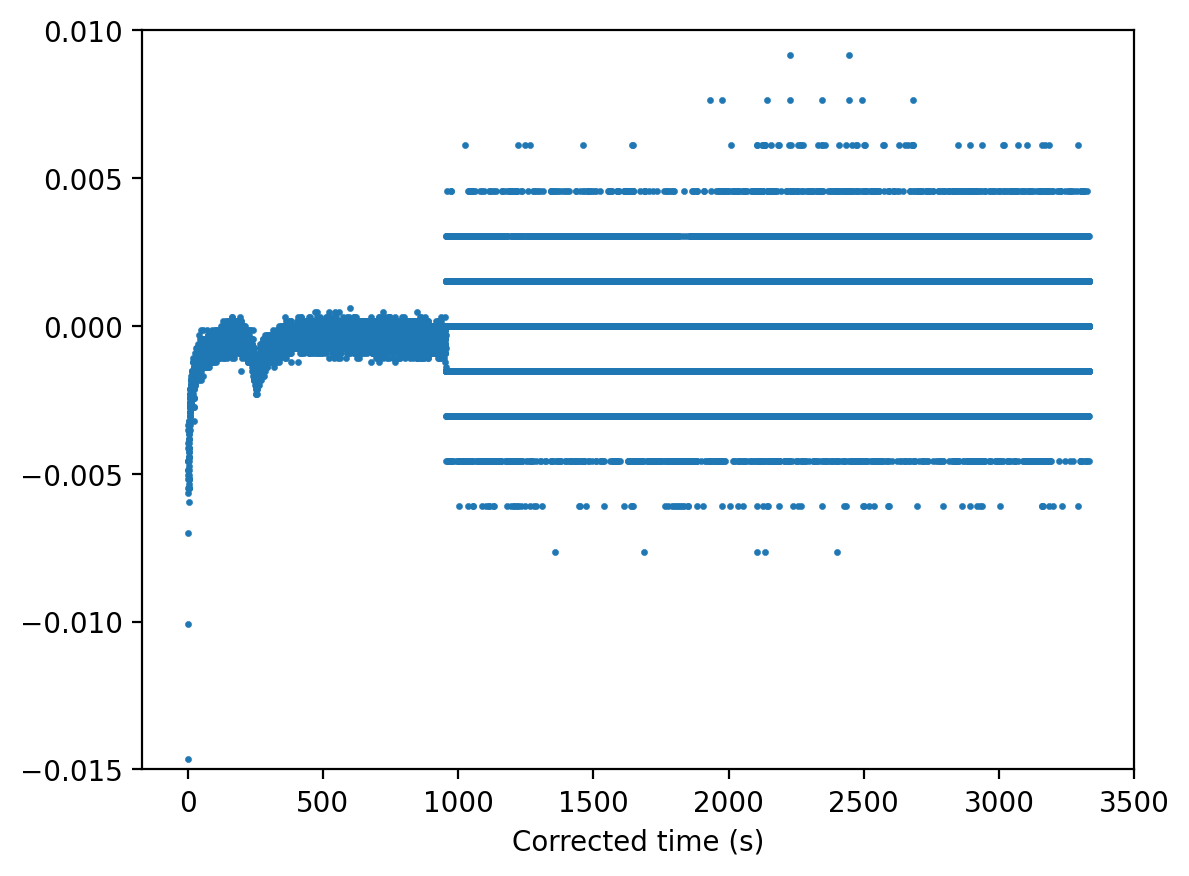

In [49]:
# Galvanostatic
galv_files = [os.path.join(folders[1], i) for i in os.listdir(folders[1])]

df = pd.read_csv(galv_files[0], sep = '\t')
df2 = pd.read_csv(galv_files[0], sep = '\t')
df2['WE(1).Potential (V)'] = df2['WE(1).Potential (V)'] + 3.05 + 0.22

dt = df['Corrected time (s)'][1] - df['Corrected time (s)'][0]
du_dt = np.gradient(df['WE(1).Potential (V)'], dt)

#Plot
fig, ax = plt.subplots(dpi = 200)
ax2 = ax.twinx()

sns.scatterplot(data = df, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', edgecolor = None, s = 5, ax = ax)
sns.scatterplot(data = df2, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', edgecolor = None, s = 5, ax = ax2)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential vs Ag/AgCl (V)')
ax2.set_ylabel('Potential vs Li/Li$^+$ (V)')


fig, ax = plt.subplots(dpi = 200)



sns.scatterplot(x = df['Corrected time (s)'], y = du_dt, edgecolor = None, s = 5)

ax.set_ylim(-.015, 0.01)

,Corrected time (s),WE(1).Current (A),WE(1).Potential (V),WE(1).Charge (C)
0,0.000000,-0.000041,-0.898438,-0.080898
1,0.010000,-0.000041,-0.898438,-0.080898
2,0.020000,-0.000041,-0.898743,-0.080899
3,0.030000,-0.000041,-0.898438,-0.080899
4,0.040000,-0.000041,-0.898438,-0.080900
...,...,...,...,...
59995,599.949998,-0.000022,-0.898132,-0.100230
59996,599.959998,-0.000022,-0.898743,-0.100230
59997,599.969998,-0.000022,-0.898132,-0.100231
59998,599.979998,-0.000022,-0.898132,-0.100231


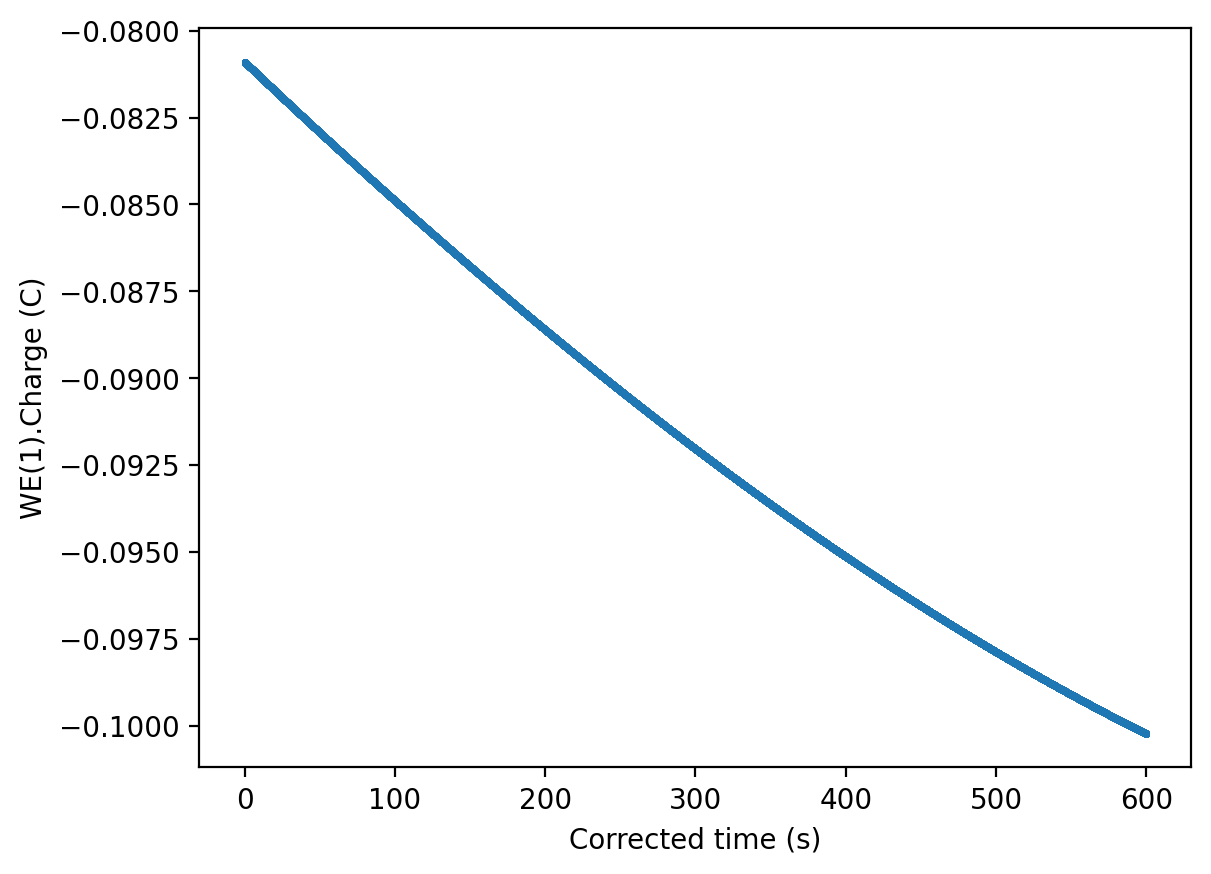

In [47]:
# Potentiostatic

pot_files = [os.path.join(folders[2], i) for i in os.listdir(folders[2])]
df = pd.read_csv(pot_files[0], sep = '\t')


#Plot
fig, ax = plt.subplots(dpi = 200)

sns.scatterplot(data = df, x = 'Corrected time (s)', y = 'WE(1).Charge (C)', edgecolor = None, s = 5, ax = ax)

df